In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from tqdm import tqdm

In [10]:
df = pd.read_orc('code_contests_cf_filtered_exploded.snappy.orc')

df

,submission_id,name,description,cf_contest_id,cf_index,cf_points,cf_rating,cf_tags,source_code,problem_url
0,0,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
1,1,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
2,2,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
3,3,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
4,4,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
...,...,...,...,...,...,...,...,...,...,...
1356501,1356501,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1356502,1356502,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\n#pragma GCC optimize...,/contest/1623/problem/E
1356503,1356503,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1356504,1356504,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E


In [11]:
submission_counts = df["problem_url"].value_counts()
submission_counts

/contest/215/problem/D    840
/contest/656/problem/A    642
/contest/501/problem/A    608
/contest/501/problem/B    588
/contest/559/problem/A    555
                         ... 
/contest/35/problem/E       1
/contest/35/problem/D       1
/contest/234/problem/B      1
/contest/120/problem/A      1
/contest/120/problem/J      1
Name: problem_url, Length: 7895, dtype: int64

In [4]:
submission_counts.mean()

171.81836605446486

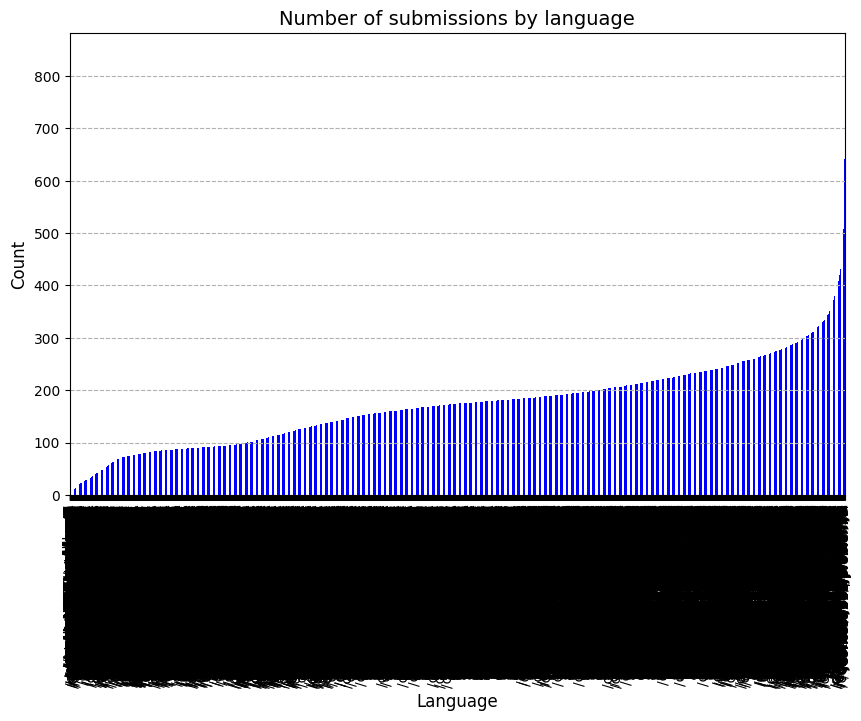

In [5]:
import matplotlib.pyplot as plt

# set the size of the plot
plt.figure(figsize=(10, 6))

# create the bar plot
ax = submission_counts.sort_values().plot(kind='bar', color='blue')

# add a title and axis labels
ax.set_title('Number of submissions by language', fontsize=14)
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# add grid lines to the plot
ax.grid(True, which='major', linestyle='--', axis='y')

# show the plot
plt.show()

In [6]:
len(submission_counts)

7895

In [12]:
final_df = pd.DataFrame(columns=df.columns)
final_df

,submission_id,name,description,cf_contest_id,cf_index,cf_points,cf_rating,cf_tags,source_code,problem_url


In [30]:
final_ar = []

In [31]:
indexes = pd.Index([])
problems = set(df['problem_url'].values)
for problem in tqdm(problems):
    if submission_counts[problem] > 300:
        ser = df[df['problem_url'] == problem].source_code.apply(lambda x: len(str(x))).sort_values(ascending=False)
        indexes = ser[:submission_counts[problem]-300].index
        final_ar.append(indexes)
    #final_df = pd.concat((final_df,*final_ar))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7895/7895 [00:30<00:00, 256.87it/s]


In [32]:
final_ar

[Int64Index([1294236, 1294287], dtype='int64'),
 Int64Index([238978], dtype='int64'),
 Int64Index([451395, 451464, 451309, 451357, 451477, 451430, 451273, 451179,
             451219, 451289, 451198, 451410, 451155, 451409, 451280, 451180,
             451389, 451193, 451333, 451332, 451156, 451191, 451297, 451197,
             451232, 451225, 451205, 451449, 451237, 451288, 451291, 451150,
             451244, 451186, 451296, 451215, 451281, 451265, 451428, 451330,
             451406, 451258, 451271, 451424, 451469, 451166, 451283, 451370,
             451324, 451414, 451328, 451461, 451240, 451323, 451435, 451223,
             451230, 451426, 451272],
            dtype='int64'),
 Int64Index([445252, 445329, 445234, 445300, 445143, 445207, 445132, 445236,
             445126, 445133, 445256],
            dtype='int64'),
 Int64Index([630622, 630704, 630468, 630637], dtype='int64'),
 Int64Index([696771, 696873, 696778, 696904, 696697, 696762, 696900, 696687,
             696657, 696888

In [37]:
len(final_ar)

406

In [38]:
for i in tqdm(final_ar):
    df = df.drop(index=i)
df

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 406/406 [01:10<00:00,  5.73it/s]


,submission_id,name,description,cf_contest_id,cf_index,cf_points,cf_rating,cf_tags,source_code,problem_url
0,0,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
1,1,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
2,2,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
3,3,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
4,4,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
...,...,...,...,...,...,...,...,...,...,...
1356501,1356501,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1356502,1356502,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\n#pragma GCC optimize...,/contest/1623/problem/E
1356503,1356503,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1356504,1356504,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E


In [39]:
submission_counts = df["problem_url"].value_counts()
submission_counts.mean()

168.89512349588347

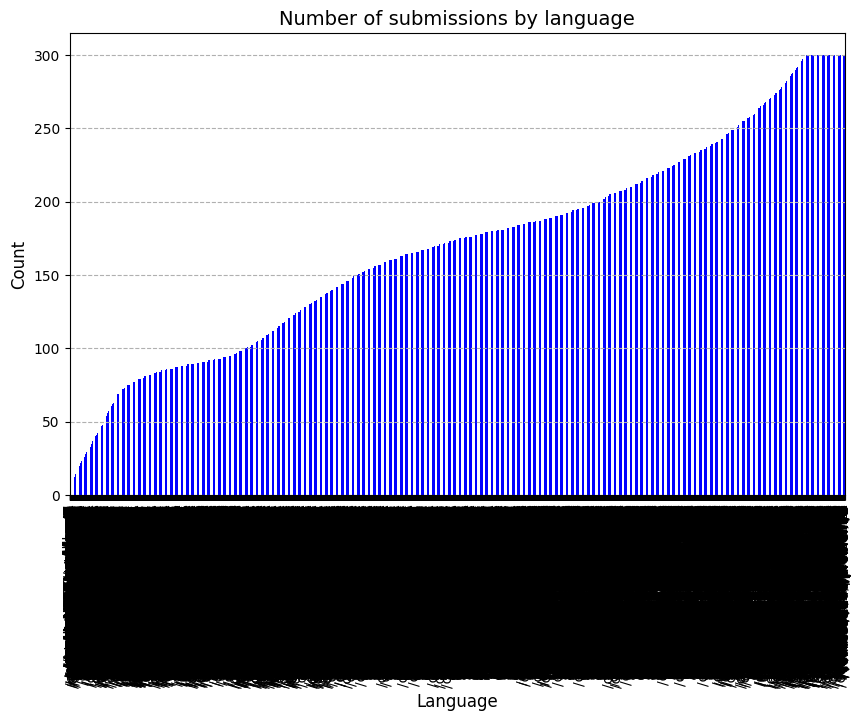

In [40]:
import matplotlib.pyplot as plt

# set the size of the plot
plt.figure(figsize=(10, 6))

# create the bar plot
ax = submission_counts.sort_values().plot(kind='bar', color='blue')

# add a title and axis labels
ax.set_title('Number of submissions by language', fontsize=14)
ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# add grid lines to the plot
ax.grid(True, which='major', linestyle='--', axis='y')

# show the plot
plt.show()

In [41]:
df.to_orc('code_contests_cf_filtered_exploded_truncated.snappy.orc', engine_kwargs={"compression": "snappy"})

In [42]:
test_df = pd.read_orc('code_contests_cf_filtered_exploded_truncated.snappy.orc')

test_df

,submission_id,name,description,cf_contest_id,cf_index,cf_points,cf_rating,cf_tags,source_code,problem_url
0,0,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
1,1,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
2,2,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
3,3,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
4,4,1012_E. Cycle sort,You are given an array of n positive integers ...,1012,E,2500.0,3100.0,"[dsu, math]",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1012/problem/E
...,...,...,...,...,...,...,...,...,...,...
1333422,1356501,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1333423,1356502,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\n#pragma GCC optimize...,/contest/1623/problem/E
1333424,1356503,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
1333425,1356504,1623_E. Middle Duplication,A binary tree of n nodes is given. Nodes of th...,1623,E,2750.0,2500.0,"[data structures, dfs and similar, greedy, str...",#include <bits/stdc++.h>\nusing namespace std;...,/contest/1623/problem/E
